In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import re
# Basic EDA, cleaning, and visualization modules

from bs4 import BeautifulSoup
from IPython.core.display import display, HTML
import requests
# Webscraping 

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error
import scipy.stats as stats
# Modeling

Load the Data as Dataframe into df_heart

In [ ]:
df_heart= pd.read_csv("./heart.csv", index_col=0)
df_heart.head()


,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
Age,,,,,,,,,,,
40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
df_heart["HeartDisease"] = df_heart["HeartDisease"].astype(bool)
df_heart
df_heart.to_csv('heart_out.csv')

**Exploratory Data Analysis**

In [ ]:
df_heart.isnull().sum()

Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df2 = df_heart.copy()
df2['Sex'] = le.fit_transform(df2['Sex'])
df2 ['ChestPainType']= le.fit_transform(df2['ChestPainType'])
df2 ['RestingECG']= le.fit_transform(df2['RestingECG'])
df2 ['ExerciseAngina']= le.fit_transform(df2['ExerciseAngina'])
df2 ['ST_Slope']= le.fit_transform(df2['ST_Slope'])


**generate a list of categorical variable names**

Categorical data can be considered as gathered information that is divided into groups
Nominal data : name variable without any numerical values
Ordinal data ; data consists of a set of orders or scale, hihg low medium

In [ ]:
heart_cat= df_heart.dtypes[df_heart.dtypes == "object"].index.tolist()
heart_cat

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

## **Data Visuazlization**

Correlation Matrix

[Text(0.5, 1.0, 'Correlation Matrix Heart Dataframe')]

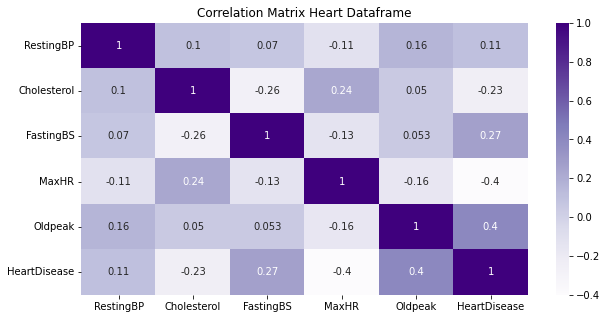

In [ ]:
#Correlation matrix using seaborn library
import seaborn as sns
corr = df_heart.corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr, cmap="Purples",annot=True).set(title='Correlation Matrix Heart Dataframe')

In [ ]:
# Data Visualization Heart Disease with respect to Gender
import plotly.express as px

fig = px.bar(df_heart, x="HeartDisease", color="Sex", title="Heart Disease vs Sex", barmode ='group')

fig.show()

In [ ]:
fig = px.bar(df_heart, x="RestingECG", color="HeartDisease", title="Heart Disease vs Resting ECG", barmode ='group')

fig.show()

In [ ]:
fig = px.bar(df_heart, x="HeartDisease", color="Cholesterol", title="Heart Disease vs Resting ECG", barmode ='group')

fig.show()

In [ ]:
fig = px.bar(df_heart, x="ChestPainType", color="HeartDisease", title="Heart Disease vs Resting ECG", barmode ='group')

fig.show()

BOX Plots
 
 Box plots visually show the distribution of numerical data and skewness through displaying the data quartiles (or percentiles) and averages

 Box plots are a useful way to visualize differences among different samples or groups. They manage to provide a lot of statistical information, including — medians, ranges, and outliers



 Compare the respective medians of each box plot. If the median line of a box plot lies outside of the box of a comparison box plot, then there is likely to be a difference between the two groups.


 Compare the interquartile ranges (that is, the box lengths), to examine how the data is dispersed between each sample. The longer the box the more dispersed the data. The smaller the less dispersed the data.

In [ ]:
fig = px.box(df_heart, x="HeartDisease", y="Cholesterol", color="HeartDisease")
fig

In [ ]:
fig = px.box(df_heart, x="HeartDisease", y="MaxHR", color="HeartDisease")
fig

In [ ]:
fig = px.box(df_heart, x="HeartDisease", y="MaxHR", color="HeartDisease")
fig

In [ ]:
Logistic regression predicts binary outcomes, meaning that there are only two possible outcomes. 

In [ ]:
df_heart

,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
Age,,,,,,,,,,,
40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...
45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1


In [ ]:
heart_cat= df_heart.dtypes[df_heart.dtypes == "object"].index.tolist()
heart_cat

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

# Label Encoding

After importing the module, an instance of the label encoder object is created and assigned the variable le.
A copy of the original loans_df is created for this example, but this step is not necessary for using label encoder.
The label encoder's fit_transform() method is used to first train the label encoder, then convert the text data into numerical data.

Categorical variables/features are any feature type can be classified into two major types:


**Nominal Encoding**

When we have a feature where variables are just names and there is no order or rank to this variable's feature.


**Ordinal**

When we have a feature where variables have some order/rank.

We apply One-Hot Encoding when:

The categorical feature is not ordinal (like the countries above)
The number of categorical features is less so one-hot encoding can be effectively applied

We apply Label Encoding when:

The categorical feature is ordinal (like Jr. kg, Sr. kg, Primary school, high school)
 The number of categories is quite large as one-hot encoding can lead to high memory consumption

All the data here are nominal since there are no herirarchy or order present here
If we use label encoding in nominal data, we give the model incorrect information about our data. The model algorithm can act as if there is a hierarchy among the data.



employ one-hot-encoding followed by PCA for dimensionality reduction

In [ ]:
heart_encoded = pd.get_dummies(df_heart, columns=["ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope", "Sex"])
heart_encoded.head()

,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,Sex_F,Sex_M
Age,,,,,,,,,,,,,,,,,,,,
40,140,289,0,172,0.0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1
49,160,180,0,156,1.0,1,0,0,1,0,0,1,0,1,0,0,1,0,1,0
37,130,283,0,98,0.0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,1
48,138,214,0,108,1.5,1,1,0,0,0,0,1,0,0,1,0,1,0,1,0
54,150,195,0,122,0.0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1


In [ ]:
#Standardisation
# Standardization is good to use when our data follows a normal distribution. 
#It can be used in a machine learning algorithm where we make assumptions about the distribution of data like linear regression etc


# Standardization is another scaling method where the values are centered around mean with a unit standard deviation. 
#It means if we will calculate mean and standard deviation of standard scores it will be 0 and 1 respectiv
from sklearn.preprocessing import StandardScaler
import numpy as np


PCA is a statistical technique to speed up machine learning algorithms when the number of input features (or dimensions) is too high. PCA reduces the number of dimensions by transforming a large set of variables into a smaller

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)


Min-Max Normalization:

This method rescales the range of the data to [0,1]. In most cases, standardization is used feature-wise as well

Unit Vector Normalization:

Scaling to unit length shrinks/stretches a vector (a row of data can be viewed as a D-dimensional vector) to a unit sphere.



Normalization or Min-Max Scaling is used to transform features to be on a similar scale. The new point is calculated as:

X_new = (X - X_min)/(X_max - X_min)
This scales the range to [0, 1] or sometimes [-1, 1]. Geometrically speaking, transformation squishes the n-dimensional data into an n-dimensional unit hypercube. Normalization is useful when there are no outliers as it cannot cope up with them. Usually, we would scale age and not incomes because only a few people have high incomes but the age is close to uniform.

Standardization or Z-Score Normalization is the transformation of features by subtracting from mean and dividing by standard deviation. This is often called as








Normalization is useful when your data has varying scales and the algorithm you are using does not make assumptions about the distribution of your data, such as k-nearest neighbors and artificial neural networks.


assumptions about your data having a Gaussian distribution, such as linear regression, logistic regression, and linear discriminant analysis

In [ ]:
X = heart_encoded.copy()
X = X.drop("HeartDisease", axis=1)
X.head()
X.shape

(918, 19)

In [ ]:
y = heart_encoded["HeartDisease"].values
y[:5]

array([0, 1, 0, 1, 0])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78, train_size=0.80)


In [ ]:
# Creating a StandardScaler instance.
from sklearn.preprocessing import RobustScaler,MinMaxScaler,StandardScaler

scaler = StandardScaler()
# Fitting the Standard Scaler with the training data.
X_scaler = scaler.fit(X_train)

# Scaling the data.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='lbfgs',
   max_iter=200,
   random_state=1)

In [ ]:
classifier.fit(X_train_scaled, y_train)
y_pred = classifier.predict(X_test_scaled)


In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.8315217391304348


**Decision Tree**

In [ ]:
# Creating the decision tree classifier instance.
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
model = tree.DecisionTreeClassifier()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
y_pred

array([1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1])

In [ ]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

cm_df

,Predicted 0,Predicted 1
Actual 0,57,25
Actual 1,16,86


Out of 84 good loan applications (Actual 0), 50 were predicted to be good (Predicted 0), which we call true positives.
Out of 84 good loan applications (Actual 0), 34 were predicted to be bad (Predicted 1), which are considered false negatives.
Out of 41 bad loan applications (Actual 1), 22 were predicted to be good (Predicted 0) and are considered false positives.
Out of 41 bad loan applications (Actual 1), 19 were predicted to be bad (Predicted 1) and are considered true negatives.

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(734, 10)
(184, 10)
(734,)
(184,)


In [ ]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder

scaler = StandardScaler()
# Fitting the Standard Scaler with the training data.
X_scaler = scaler.fit(X_train)

# Scaling the data.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Creating the decision tree classifier instance.
model = DecisionTreeClassifier()
# Fitting the model.
model = model.fit(X_train_scaled, y_train)


In [ ]:
predictions = model.predict(X_test_scaled)


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

cm_df

,Predicted 0,Predicted 1
Actual 0,58,24
Actual 1,17,85


In [ ]:
acc_score = accuracy_score(y_test, predictions)
acc_score

0.7771739130434783

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=128, random_state=78) 
rf_model = rf_model.fit(X_train_scaled, y_train)


In [ ]:
predictions = rf_model.predict(X_test_scaled)
# Calculating the confusion matrix.
cm = confusion_matrix(y_test, predictions)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

cm_df

,Predicted 0,Predicted 1
Actual 0,62,20
Actual 1,12,90


In [ ]:
acc_score = accuracy_score(y_test, predictions)
acc_score

0.8260869565217391